# How to submit your solution

You have to submit your completed Notebook. Make sure that you execute each piece of code you develop and that the result is shown in the output cell below. Save the Notebook and upload it in OLAT via the "Submission of assignment" box. The deadline for submission is <b>19 February</b>.

<b>PLEASE NOTE: We encountered a problem with the exporting routines. We will let you know asap via OLAT mail how the Notebook has to be exported and uploaded to OLAT. </b>

---

# Cooking Spectra


## From raw to reflectance 

***

## Intro

During photosynthesis, the energy received from the sun can be too high for the plant. To protect the photosynthetic apparatus from damage, the plant needs to get rid of the excess energy [1]. This can be achieved either as heat or by the emission of light. The latter mechanism is called fluorescence (i.e. emitting light very quickly after excitation [2]). The fluorescence signal is linked to photosynthesis and thus is regarded as a good indicator for carbon uptake in plants (i.e. GPP [1]). Since this mechanism is induced by the sun, it is also referred to as Sun-Induced chlorophyll Fluorescence (SIF). <br>

But how can we measure fluorescence? <br>

Here the so-called FLOX, or Fluorescence Box, comes into play (https://www.jb-hyperspectral.com/products/flox/). It was developed specifically to help measuring SIF. The device measures the incoming radiation as well as the radiation reflected by the vegetation. SIF will add a weak signal that was not present in the incoming radiation to the reflected radiation. With the help of the two measurements (incoming and reflected radiation) we can then try to extract SIF from the reflected signal. In the figure below, the fluorescence signal is highlighted in green. <br>

The FLOX acquires measurements under daylight conditions with a frequency in the minute range. This means we get information about plant photosynthesis with a high temporal resolution. <br>

***

<img src="figures/floxsetup.PNG" />
<img src="figures/dataprocessing.PNG" />

***

To go from raw data (as provided by the FLOX) to reflectance we first need to calibrate the data. This will convert Digital Numbers (DNs) to radiance values. DNs represent the sensors electrical response to a certain amount of radiation. The process of calibration converts this electrical signal to a physical measurement (radiance) with unit $\left(\frac{W}{m^2 sr^1 nm^1} \right)$. By combining the incoming radiance with the reflected radiance we can then derive reflectance. Since we expect SIF to add a small amount of energy we should see this in the reflectance. SIF emission exhibits two peaks close to the oxygen absorption bands $O_2A$ and $O_2B$. Here the reflectance should exhibit two peaks because we have almost no incoming energy in the absorption bands (compare with the two peaks highlighted in green in the figure above). <br>

***

## Data Ingestion

We need to read two data files, both in *.CSV* format. The first is the raw data measured by the device. The second is the calibration file, it contains the information about the center wavelength of each of the 1024 bands of the sensor as well as the calibration information required to transform DNs into radiance. The files are seperate because the sensor is usally calibrated in a calibration facility and then shipped to the customer. The calibration can also change over time due to sensor degradation. Therefore these files are kept apart.

## Reading the raw data
Whenever you want to read data into a program, you can follow a few simple steps. 
- (2.2) Try to have a first look at the data by opening it in a text editor or a spreadsheet program (Microsoft Excel, Atom or Notepad++ are good places to start). 
- (2.3) Take note of the relevant information and its position in the data file (note also if there is a repeating pattern). 
- (2.4) Think about how you can navigate through the data file <b>line by line</b>. Also try to find out how data elements are separated in the file (very common: Tab, Comma, Semicolon)
- (2.5) Note the data types and think about other considerations.
- (2.6) Try your approach and print the relevant data to the command line.
- (2.7) Implement variables that will hold the information you read.
- (2.8) Visualize your data or construct and see if it's reasonable and contains the data you planned to read.

***

## First Look
<img src="figures/csv.PNG" />

***

## The Relevant Information
<ul>
    <li> The file contains a header (i.e. the first line is different from the rest). </li>
    <li> There are five collumns. </li>
    <li> The values in the columns are numerical data. </li>
</ul>

***

## Navigating the File
What we have to do is the following:
<ul>
    <li> Open the *.CSV* file. </li>
    <li> Discard the first line. </li>
    <li> The separator is ";".</li>
    <li> Put the rest of the lines into five different variables. </li>
</ul>

***

## Data Types and other Considerations
When we read a file we get strings, but for calculations we need other data types (e.g. integer or float). Therefore we must convert strings to the desired data types.

***

## The Approach
(1) Define a function, (2) prepare data storage variables, (3) open the file, (4) read lines and (5) store data in the variables,(6) return the data from the function, (7) use the function, (8) check if output is reasonable, (9) handle output.

***

## The Implementation

<div class="alert alert-success">
<b>Exercise 1</b>:
<ul>
    <li> 1. Define a function to read the measurement data. </li>
    <li> 1.1 The input for your new function should be the filepath of the <b>"measurements.csv"</b> file. </li>
    <li> 2. Introduce five individual lists that you can use to store the data. </li>
    <li> 3. Open the file with the Python syntax <b> "with open() as :" </b>. </li>
    <li> 4. Iterate through the file <b> line-by-line </b>. </li>
    <li> 4.1 Handle the header appropriately. </li>
    <li> 5. Store the data in the lists. <b> Don't forget </b> to convert strings to numerical value! </li>
    <li> 6. Wen the file has no more lines <b> convert </b> the lists to numpy arrays (6.1) and return them from the function (6.2). </li>
    <li> 7. <b> Use </b> the function to read the data. </li>
    <li> 8. <b> Print </b> the data of <b> one </b> variable and check if the output matches your expectation. </li>
</ul>
</div>

In [1]:
# Use this cell to write your function. 

import numpy as np

# function
def read_measurement_data(filepath):
    wr, veg, wr2, dc_wr, dc_veg = [],[],[],[],[]
    with open(filepath) as file:
        lines = file.readlines()[1:]
    for line in lines:
        split = line.split(";")
        wr.append(float(split[0].strip()))
        veg.append(float(split[1].strip()))
        wr2.append(float(split[2].strip()))
        dc_wr.append(float(split[3].strip()))
        dc_veg.append(float(split[4].strip()))
    
    result = np.array((wr, veg, wr2, dc_wr, dc_veg))
    # your code here
    return  result


In [2]:
# Use this cell to make use of the function you just wrote.

measurement = read_measurement_data("data/measurements.csv")
print(measurement[0,:])

[ 1538.  1745.  1748. ... 23566. 22538. 22566.]


***
# Visualization
We can now look at the data we extracted.


<div class="alert alert-success">
<b>Exercise 2</b>:
<ul>
    <li> Visualize the measurements (DC_WR, DC_VEG, WR, VEG, WR2). </li>
    <li> Add a title to your plot. </li>
    <li> Add axis labels to your plot. </li>
    <li> You can check your results with the figure given below, it should . </li>
</ul>
</div>

<img src= "figures/m_raw.PNG" />

Text(0.5, 1.0, 'FLOX Measurements')

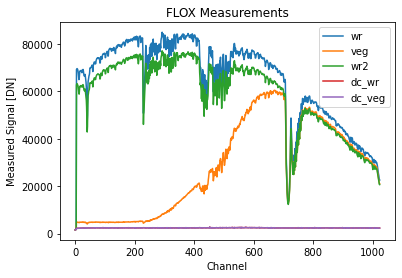

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# create a figure and axes object
fig, ax = plt.subplots()

plt.plot(measurement[0])
plt.plot(measurement[1])
plt.plot(measurement[2])
plt.plot(measurement[3])
plt.plot(measurement[4])
plt.legend(("wr", "veg", "wr2", "dc_wr", "dc_veg"))

plt.xlabel("Channel")
plt.ylabel("Measured Signal [DN]")
plt.title("FLOX Measurements")

***
# The Calibration File

To calibrate the measruement results, we need the calibration file. This file is provided by the manufacturer. It contains information on the wavelength of each band as well as the coefficient that converts the digital signal (DN) into radiance (so-called <b>gain</b>). 

<img src = "figures/csv_cal.PNG" />

The first column specifies the <b>wavelength of</b> each band, the second <b>up_coef</b> specifies the incoming radiance measurement and <b>dw_coef</b> the reflected radiance. Reading this file is very similar to the previous data file. We just need to read each column and store it in an array. The separator is again a semicolon *;*. We can skip the first line, because it only contains the textual information about the column (i.e. the header).

<div class="alert alert-success">
<b>Exercise 3</b>:
<ul>
    <li> Generally do the same as in Exercise 1.</li>
    <li> Write a function to read the data. </li>
    <li> Open the calibration file. </li>
    <li> Read the data from the file line by line and save it in a reasonable data structure. Convert strings to numerical data and return numpy arrays. </li>
    <li> Print the extracted information to the console and check the output.</li>
</ul>
</div>

In [4]:
def read_calibration(filepath):
    wl, up_coef, dw_coef = [],[],[]
    with open(filepath) as file:
        lines = file.readlines()[1:]
    for line in lines:
        split = line.split(";")
        wl.append(float(split[0].strip()))
        up_coef.append(float(split[1].strip()))
        dw_coef.append(float(split[2].strip()))
    
    result = np.array((wl, up_coef, dw_coef))
    # your code here
    return  result

In [5]:
calib = read_calibration("data/calibration.csv")
calib

array([[6.49767842e+02, 6.49934333e+02, 6.50100794e+02, ...,
        8.02851919e+02, 8.02984695e+02, 8.03117436e+02],
       [2.86375600e-03, 2.86381900e-03, 2.86388200e-03, ...,
        5.19366400e-03, 5.20902100e-03, 5.22437400e-03],
       [1.05078900e-03, 1.05086600e-03, 1.05094400e-03, ...,
        2.10924800e-03, 2.11562300e-03, 2.12199500e-03]])

***

# Calibration 

For a correct calibration we have to convert the signal of each band to radiance. The formula is:

\begin{equation*}
L = \frac{DN-DN_{DC}}{IT}*Coef
\end{equation*}

Here $DN_{DC}$ is the dark current, $IT$ is the integration time in $\left[ ms \right]$ and $Coef$ is the calibration coefficient. 
Three steps are required. First we subtract the dark current from our signal, than we divide it by the integration time and then we multiply by the coefficient. <br>

Let's write a function that does this for us. We want to provide the function with the necessary information. An array of DNs, an array of DCs, the IT and an array of coefficients.

***

<div class="alert alert-success">
<b>Exercise 4</b>:
<ul>
    <li> Define a function called <b> calibrate </b>. </li>
    <li> Determine the needed input variables based on the <b> formula </b> provided above. </li>
    <li> The <b> integration time [IT] </b> is 1000 [ms] </li>
    <li> Write the method body. </li>
    <li> Write the <b> return </b> statement, think about what the function needs to return. </li>
</ul>
</div>

In [6]:
# calibration function
def calibrate(dn, dc, it, coef):
    res = (dn-dc)/it*coef
    return res

<div class="alert alert-success">
<b>Exercise 5</b>:
<ul>
    <li> Use the method created above to calibrate the measurements. You will need to use the function three times (WR, VEG, WR2). </li>
    <li> Visualize these three calibrated measurements. </li>
    <li> Compare the visualization with the figure given below.</li>
</ul>
</div>
<img src= "figures/m_rad.PNG" />

In [21]:
wr, veg, wr2, dc_wr, dc_veg = measurement[0], measurement[1], measurement[2], measurement[3], measurement[4]
wl, up_coef, dw_coef = calib[0], calib[1], calib[2]

cal_wr1 = calibrate(wr, dc_wr, 1000, up_coef)
cal_wr2 = calibrate(wr2, dc_wr, 1000, up_coef)
cal_veg = calibrate(veg, dc_veg, 1000, dw_coef)

Let's visualize our calibrated measurements. Since we now have physical units, we can label our axes accordingly.

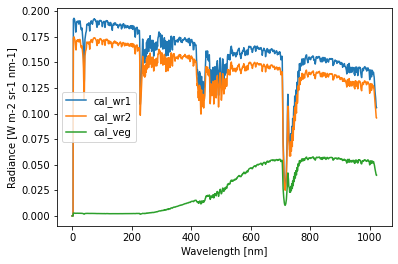

In [23]:
# Plot the calibrated measurement data

plt.plot(cal_wr1)
plt.plot(cal_wr2)
plt.plot(cal_veg)
plt.xlabel("Wavelength [nm]")
plt.ylabel("Radiance [W m-2 sr-1 nm-1]")
plt.legend(("cal_wr1","cal_wr2","cal_veg"))

***

# Reflectance

Going from radiance to reflectance is very simple. We just divide the radiance by the irradiance. Since we have two irradiacne measurements we can use the average of those. 
\begin{equation*}
R = \frac{VEG}{WR_{average}} * 100
\end{equation*}


<div class="alert alert-success">
<b>Exercise 7</b>:
<ul>
    <li> Define a function called <b> reflectance </b>. </li>
    <li> Define the required input parameter(s)</li>
    <li> Define the required output parameter(s)</li>
    <li> Calculate the reflectance</li>
    <li> Visualize the reflectance</li>
    <li> <b> Try </b> to higlight in the plot where we can see the SIF signal. For this use <b> plt.axvspan() </b>. </li>
    <li> Compare the visualization with the figure</li>
</ul>
</div>
<img src = "figures/m_ref.PNG" />


In [24]:
# define the function
def reflectance(ir1, ir2, veg):
    res = (((veg/((ir1+ir2)/2))*100))
    return res

In [25]:
# calibrate the data
refl = reflectance(cal_wr1,cal_wr2,cal_veg)

/tmp/ipykernel_1107058/3290898463.py:3: RuntimeWarning: divide by zero encountered in true_divide
  res = (((veg/((ir1+ir2)/2))*100))
/tmp/ipykernel_1107058/3290898463.py:3: RuntimeWarning: invalid value encountered in true_divide
  res = (((veg/((ir1+ir2)/2))*100))


Text(0, 0.5, 'Reflectance [%]')

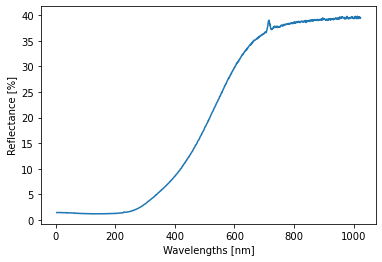

In [26]:
# visualize the data here

plt.plot(refl)
plt.xlabel("Wavelengths [nm]")
plt.ylabel("Reflectance [%]")

---
# Creating an XArray
We now have 3 different arrays that we might want to use later in other programs or that we want to share with other researchers. Therefore we want to store the data into an xarray and export that to a netcdf file. 

<div class="alert alert-success">
<b>Exercise 8</b>:
<ul>
    <li> 1. Create an empty xarray dataset.</li>
    <li> 2. Add the first array corresponding to incoming radiance to the dataset, use dims="wavelength" and for the coords=[] parameter please specify the wavelenghts array you read from the calibration file. </li>
    <li> 3. Add the other signals (incoming 2, reflected, reflectance). </li>
    <li> 4. Add the attributes units and long_name to the wavelengths coordinate (unit is nm).</li>
    <li> 5. Add the units and long_name attributes to the incoming and reflected radiance as well as the reflectance variables.</li>
    <li> 6. Compare your xarray dataset with the one presented below. </li>
    <li> 7.1 Use the built-in plot function of your xarray dataset to create a figure with two subplots. </li>
    <li> 7.2 The first subplot should show the incoming and reflected radiance. </li>
    <li> 7.3 The second subplot should show the reflectance. </li>
</ul>
</div>
<img src="figures/xarr.PNG" />

In [12]:
#Xarray:

#DataArray für wavelength:
import xarray

attrs = {"long name": "wavelength","unit":"nm"}
wl = xarray.DataArray(
    data=wl,
    name='wavelength',
    dims=('wavelength',),
    attrs=attrs
)

#DataArray für einzelne Signale:
attrs = {'long_name': 'incoming Radiance 1','units': 'mW/m2/nm/sr'}
coords = {'wavelength': wl}

rad_inc_1 = xarray.DataArray(
    data=cal_wr1,
    name='rad_inc_1',
    dims=('wavelength',),
    coords=coords,
    attrs=attrs
)
attrs = {'long_name': 'incoming Radiance 2','units': 'mW/m2/nm/sr'}
rad_inc_2 = xarray.DataArray(
    data=cal_wr2,
    name='rad_inc_2',
    dims=('wavelength',),
    coords=coords,
    attrs=attrs
)

attrs = {'long_name': 'Reflected Radiance','units': 'mW/m2/nm/sr'}
rad_ref = xarray.DataArray(
    data=cal_veg,
    name='rad_ref',
    dims=('wavelength',),
    coords=coords,
    attrs=attrs
)

attrs = {'long_name': 'Reflectance','units': '%'}
ref = xarray.DataArray(
    data=refl,
    name='refl',
    dims=('wavelength',),
    coords=coords,
    attrs=attrs
)

#final DataArray wird mit Merge gemacht.
#
#https://xarray.pydata.org/en/stable/user-guide/combining.html#merge
#https://xarray.pydata.org/en/stable/generated/xarray.merge.html


final = xarray.merge([rad_inc_1, rad_inc_2, rad_ref, ref],  combine_attrs="drop_conflicts")
final

<xarray.Dataset>
Dimensions:     (wavelength: 1024)
Coordinates:
  * wavelength  (wavelength) float64 649.8 649.9 650.1 ... 802.9 803.0 803.1
Data variables:
    rad_inc_1   (wavelength) float64 0.0 -2.864e-06 -2.864e-06 ... 0.1055 0.1057
    rad_inc_2   (wavelength) float64 0.0 2.864e-06 ... 0.09601 0.09571
    rad_ref     (wavelength) float64 0.0 -2.102e-06 ... 0.03984 0.03972
    refl        (wavelength) float64 nan -inf 14.68 inf ... 39.34 39.55 39.44

Text(0, 0.5, 'Reflectance [%]')

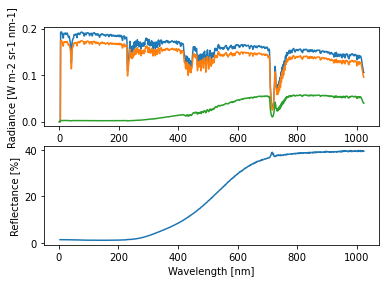

In [13]:
fig, ax = plt.subplots(2)

ax[0].plot(final.rad_inc_1)
ax[0].plot(final.rad_inc_2)
ax[0].plot(final.rad_ref)
ax[1].plot(final.refl)

ax[1].set_xlabel('Wavelength [nm]')
ax[0].set_ylabel("Radiance [W m-2 sr-1 nm-1]")
ax[1].set_ylabel("Reflectance [%]")

<img src="figures/subplots.PNG" />

xarray.core.dataarray.DataArray

***
# Timeseries of SIF

From the data we just produced, we can derive SIF values. However, the actual method to get SIF from the measurement is too complicated. Therefore we provide you with a new file that contains daily SIF values. We will use this for the bonus part of the exercise. 

In this section, you can explore on your own two additional concepts. Firstly you can look at the <b> pandas </b> library. A very important library in the Python ecosystem. It provides many data analysis tools. Pandas creates so-called data-frames. Think of a data-frame like a table with rows, columns and a header.

Secondly you can look at so-called date-time objects. A date-time object contains all the functionality required to efficiently handle dates and times in Python. It will handle leap-seconds, leap-years, months with different amount of days, and much much more. 

In the example below we will read data from a CSV with the help of <b> pandas </b> (import pandas as pd, the function to read data from csv is called <b> read_csv() </b>). The first column contains the measurement time as a string in the following way: "03.06.2019 05:00". We can access the first column with <b> yourvariablename\['Time'\] </b>. 

In order to correctly convert this string to a date-time object using the <b> to_datetime() </b> function from the pandas library, you will need to describe to pandas the different parts of the string. This is done by using keywords. Here is an incomplete list:

<ul>
    <li> d = day </li>
    <li> m = month </li>
    <li> Y = year </li>
    <li> H = hour </li>
    <li> M = minute </li>
</ul>

With the use of these keywords and the %-symbol the string above can be explained to Python. It looks like this: format = "%d.%m.%Y %H:%M". Let's assume we read the csv and stored in the variable "df", then we could write: <b> df\['Time'\] = pd.to_datetime(df\['Time'\], format = "%d.%m.%Y %H:%M") </b> which would convert the time column (at the moment handled as strings) in our data-frame to datetime objects. 

***

<div class="alert alert-success">
<b>Bonus 1 </b>:
<ul>
    <li> Read the file "fluorescence.csv" using the pandas library. </li>
    <li> Parse the time column, remember to specify the correct format. </li>
    <li> Visualize SIF over the course of a day. </li>
    <li> Add x and y labels. </li>
    <li> <b> Challenge: </b> Use the date (withouth the time) as title (do not simply write the date, get it from the data). </li>
    <li> <b> Challenge: </b> Display the time (use hours and minutes only). </li>
    <li> <b> Challenge: </b> Angle the x-axis ticks by 25°. </li>
</ul>
</div>

In [14]:
import pandas as pd

In [15]:
# read data here (use pandas + read_csv())
fluoresence = pd.read_csv("data/fluorescence.csv", sep = ";")

In [16]:
# parse the time column to a datetime object for dates and times (use pandas + to_datetime() and the format explained above.)
fluoresence["Time"] = pd.to_datetime(fluoresence["Time"], format = "%d.%m.%Y %H:%M")

In [17]:
# look at the created data frame, use the head() or tail() function of a pandas dataframe
fluoresence

,Time,Total_SIF
0,2019-06-03 05:00:00,-9.228120
1,2019-06-03 05:01:00,-9.749140
2,2019-06-03 05:02:00,-11.399040
3,2019-06-03 05:03:00,-11.471621
4,2019-06-03 05:04:00,-14.607495
...,...,...
1399,2019-06-03 21:56:00,NaN
1400,2019-06-03 21:57:00,NaN
1401,2019-06-03 21:58:00,NaN
1402,2019-06-03 21:59:00,NaN


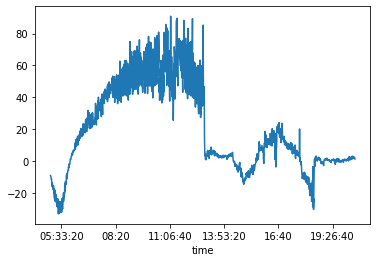

In [18]:
# visualization
fig, ax = plt.subplots()
ax.plot(fluoresence["Time"].dt.time, fluoresence["Total_SIF"], label = 'cosine')

# Time series from NetCDF
Here you can try to open an external dataset stored in the netcdf (".nc") file format. Have a look at the dataset and try to solve the tasks. You will see how simple the task is when using the xarray library to open the netcdf file. 

<div class="alert alert-success">
<b>Bonus 2 </b>:
<ul>
    <li> Read the file "xr_ts.nc".</li>
    <li> Look at the dataset. </li>
    <li> Visualize a time series of reflected and incoming radiance at 755 nm.</li>
</ul>
</div>

In [31]:
with xarray.open_dataset("data/xr_ts.nc") as time_series:
    xr_ts = time_series

xr_ts

<xarray.Dataset>
Dimensions:     (time: 2113, wavelength: 1024)
Coordinates:
  * time        (time) datetime64[ns] 2018-07-09T06:13:23 ... 2018-07-11T19:2...
  * wavelength  (wavelength) float64 649.8 650.0 650.1 ... 812.3 812.4 812.6
Data variables:
    ref_rad     (time, wavelength) float64 ...
    inc_rad     (time, wavelength) float64 ...
Attributes:
    info:     Data from the FLUO sensor of the FLOXBOX. The measurements were...

Coordinates:
  * time        (time) datetime64[ns] 2018-07-09T06:13:23 ... 2018-07-11T19:2...
  * wavelength  (wavelength) float64 649.8 650.0 650.1 ... 812.3 812.4 812.6

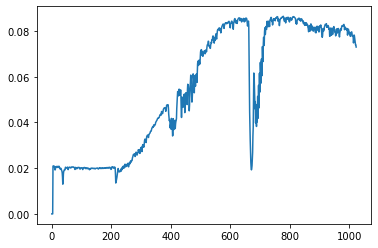

# References
[1] Porcar-Castell, A., Tyystjärvi, E., Atherton, J., van der Tol, C., Flexas, J., Pfündel, E.E., Moreno, J., Frankenberg, C., & Berry, J.A. (2014). Linking chlorophyll a fluorescence to photosynthesis for remote sensing applications: mechanisms and challenges. Journal of experimental botany, 65, 4065–4095. <br>
[2] Encyclopaedia Britannica (2019). Fluorescence. https://www.britannica.com/science/fluorescence.